In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [52]:
Q = np.array([[1/np.sqrt(5), 2/np.sqrt(5)],
              [-2/np.sqrt(5),1/np.sqrt(5)]])
Q_inv = np.linalg.inv(Q)
lambda_mat = np.array([[100.0, 0],
                       [0.0,  20.0]])
D = Q@lambda_mat@Q_inv
D

array([[ 36., -32.],
       [-32.,  84.]])

In [53]:
xy = [2,3]
x,y = xy
print(x, y, xy)

2 3 [2, 3]


In [54]:
qolo = plt.imread("Qolo_T_CB_top_bumper.png")

In [55]:

# #qolo = mpimg.imread("Qolo_T_CB_top_bumper.png")

# height = 6
# width = 10
# x = 10
# fig, ax = plt.subplots(figsize = (width, height))
# newax = fig.add_axes([x/width,0.6,0.1,0.1])
# newax.imshow(qolo)
# plt.axis('off')
# # newax.tick_params(
# #     axis='both',          # changes apply to the x-axis
# #     which='both',      # both major and minor ticks are affected
# #     bottom=False,      # ticks along the bottom edge are off
# #     top=False,         # ticks along the top edge are off
# #     left = False,
# #     right = False,
# #     labelbottom=False) # labels along the bottom edge are off


# plt.show()

In [56]:
# from matplotlib.transforms import Affine2D
# import mpl_toolkits.axisartist.floating_axes as floating_axes

In [57]:
# tr = Affine2D().rotate_deg(30)

# grid_helper = floating_axes.GridHelperCurveLinear(
#     tr, extremes=(-0.5, 3.5, 0, 4),
#     # grid_locator1=MaxNLocator(nbins=4),
#     # grid_locator2=MaxNLocator(nbins=4),
# )

# ax1 = fig.add_subplot(
#     131, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper
# )
# aux_ax = ax1.get_aux_axes(tr)
# aux_ax.bar([0, 1, 2, 3], [3, 2, 1, 3])
# ax1 = plt.imshow(qolo)

# plt.show()

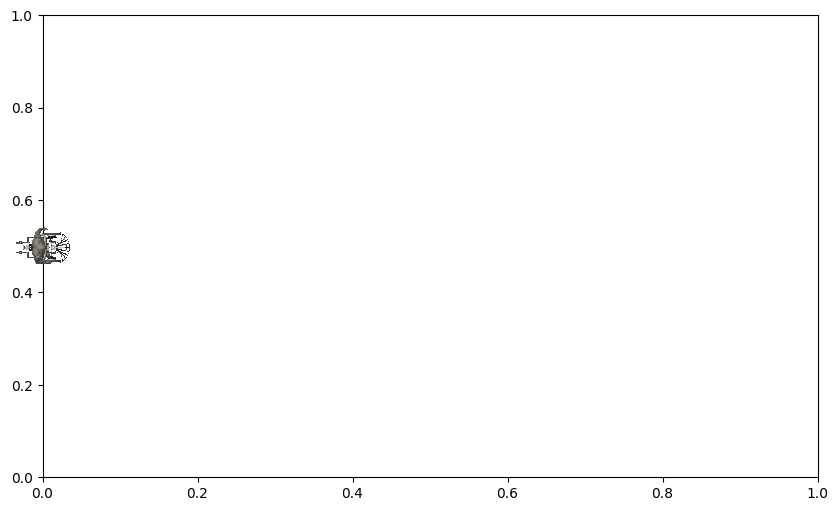

In [58]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent

fig, ax = plt.subplots(figsize =(10,6))
imagebox = OffsetImage(qolo, zoom = 0.05)
#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (0, 0.5), frameon = False)
ax.add_artist(ab)

In [1]:
import numpy as np

In [3]:
X = np.array([[1,2,3,4],[5,6,7,8]])
r, theta = X[:,1]
print(r,theta)

2 6


In [7]:
for i in range(3): 
    print(i)

0
1
2


In [8]:
x = np.array([1,2,3])
y = x[[0,2]]
print(y)

[1 3]


In [ ]:
# example
#fig = plt.figure()
fig, axs = plt.subplots(2,2, figsize = (8,6))
fig.tight_layout(pad = 3.5, w_pad = 1., h_pad=3.0)
for k in range(4):
  # plt.subplot(2,2,k)
  # plt.plot(t,r_list[:,k], label='lenght', color = "r")
  # plt.plot(t,theta_list[:,k], label='theta', color = "b")
  # plt.legend()
  # plt.title("leg", k)
  ax = axs[int(np.floor(k/2)), k%2]
  ax.plot(t,r_list[:,k], label='lenght', color = "r")
  ax.plot(t,theta_list[:,k], label='theta', color = "b")
  ax.plot(t,dr_list[:,k], label='dr', color = "orange")
  ax.plot(t,dtheta_list[:,k], label='dtheta', color = "g")
  ax.legend(loc="upper right")
  ax.set_title(f"leg {k}")
  ax.set_xlabel("Time")
  ax.set_ylabel("Amplitude")

fig.suptitle(r"Parameters r, $\theta$, $\dot{r}$, $\dot{\theta}$ for all 4 legs in trot mode") #u03B8
fig.show()
plt.show()
pass

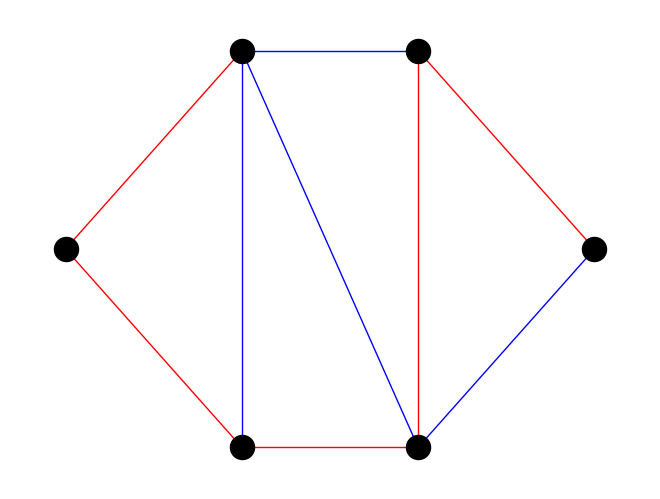

In [5]:
#blackbox io

import networkx as nx
import pylab as py
blue_edges = [('B', 'C'), ('B', 'D'), ('B', 'E'), ('E', 'F')]
red_edges = [('A', 'B'), ('A', 'C'), ('C', 'E'), ('D', 'E'), ('D', 'F')]

G=nx.Graph() #define G
G.add_edges_from(blue_edges)
G.add_edges_from(red_edges)

pos = {'A':(0,0), 'B':(1,1), 'C':(1,-1), 'D':(2,1), 'E':(2,-1), 'F':(3,0)}

# nx.draw_networkx(G, pos=pos, edgelist = [], node_color = 'k')
# nx.draw_networkx(G, pos=pos, nodelist = [], edgelist = blue_edges, edge_color = 'b')
# nx.draw_networkx(G, pos=pos, nodelist = [], edgelist = red_edges, edge_color = 'r')


nx.draw(G, pos=pos, edgelist = [], node_color = 'k')
nx.draw(G, pos=pos, nodelist = [], edgelist = blue_edges, edge_color = 'b')
nx.draw(G, pos=pos, nodelist = [], edgelist = red_edges, edge_color = 'r')

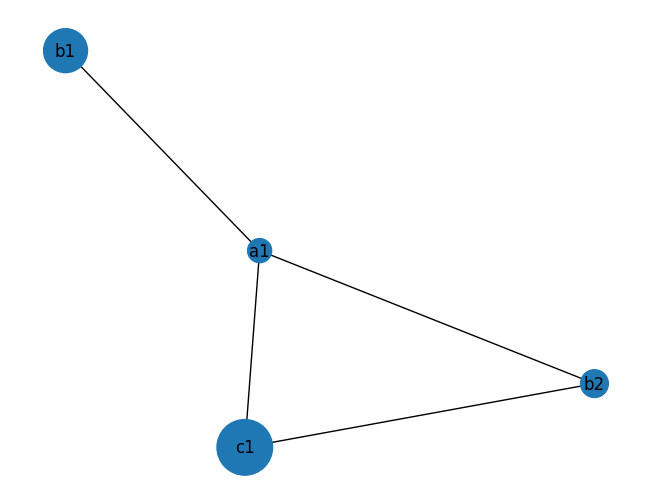

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df = pd.DataFrame({'id1': {0: 'a1', 1: 'a1', 2: 'a1', 3: 'b2', 4: 'c1'},
                   'id2': {0: 'b1', 1: 'b2', 2: 'c1', 3: 'c1', 4: 'a1'},
                   'val': {0: 10, 1: 4, 2: 1, 3: 15, 4: 3}})

g = nx.from_pandas_edgelist(df, source="id1", target="id2")

d = df.groupby("id2")["val"].sum().to_dict()
for node in g.nodes:
    d.setdefault(node, 1)

nodes, values = zip(*d.items())
nx.draw(g, nodelist=list(nodes), node_size=[v * 100 for v in values], with_labels=True)
plt.show()

Edge A -> B weights 3.3776874061001925.
Edge A -> C weights 1.68228632332338.
Edge A -> D weights 2.045098885474434.
Edge B -> A weights 3.03181761176121.
Edge B -> C weights 3.1351943561390905.
Edge B -> D weights 1.9063878166094232.
Edge C -> A weights 1.0356670011718534.
Edge C -> B weights 1.2132509043157098.
Edge C -> D weights 3.6324515407813407.
Edge D -> A weights 1.6197365498016572.
Edge D -> B weights 2.333528157820125.
Edge D -> C weights 2.018747423269561.


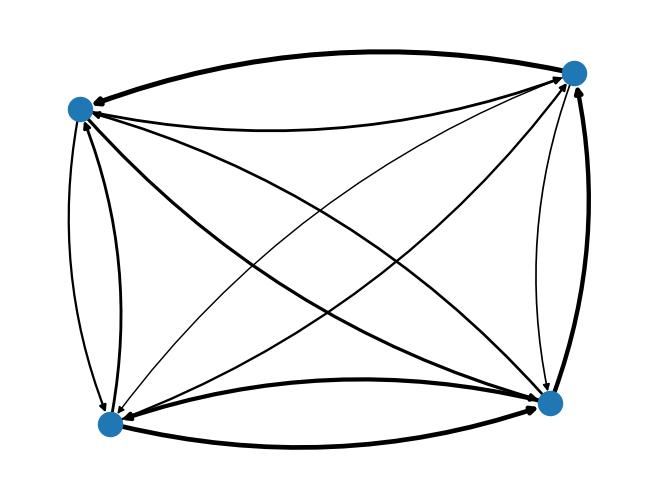

In [8]:
from itertools import combinations
import random
import networkx as nx

random.seed(0)

node_names = ['A', 'B', 'C', 'D']
G = nx.DiGraph()
G.add_nodes_from(node_names)

for (u, v) in combinations(node_names, 2):
    G.add_edge(u, v, weight = random.uniform(0, 4))
    G.add_edge(v, u, weight = random.uniform(0, 4))

for (u, v, weight) in G.edges.data('weight'):
    print(f"Edge {u} -> {v} weights {weight}.")


pos = nx.spring_layout(G)
edge_widths = [w for (*edge, w) in G.edges.data('weight')]
nx.draw(G, pos, width=edge_widths, connectionstyle='arc3, rad=.15')




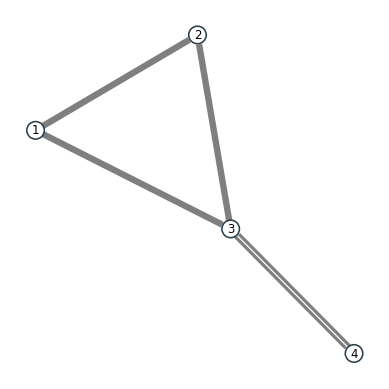

In [18]:
#!/usr/bin/env python

"""
https://stackoverflow.com/questions/61412323/separate-edge-arrows-in-python-networkx-directed-graph
"""

import matplotlib.pyplot as plt
import networkx as nx
import netgraph

G = nx.DiGraph()

G.add_edge('1','2')
G.add_edge('1','3')
G.add_edge('3','2')
G.add_edge('3','4')
G.add_edge('4','3')

netgraph.Graph(G, node_color='w', edge_color='k', edge_width=2.0, node_labels={str(ii) : str(ii) for ii in range(1,5)})
plt.show()




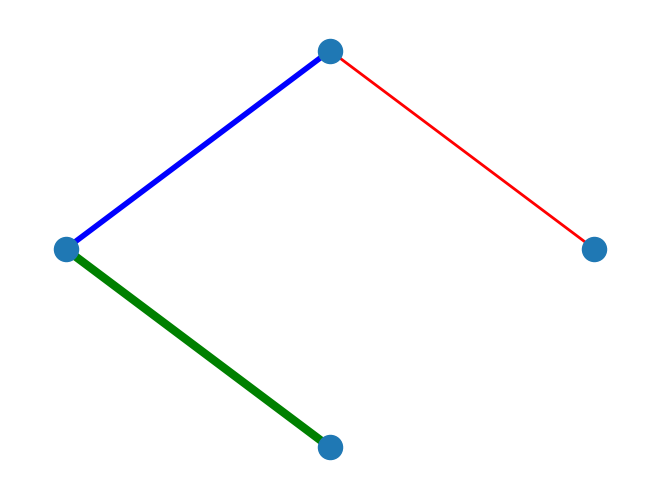

In [25]:
import networkx as nx

G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edgelist=edges, edge_color=colors, connectionstyle='arc3', width=weights)




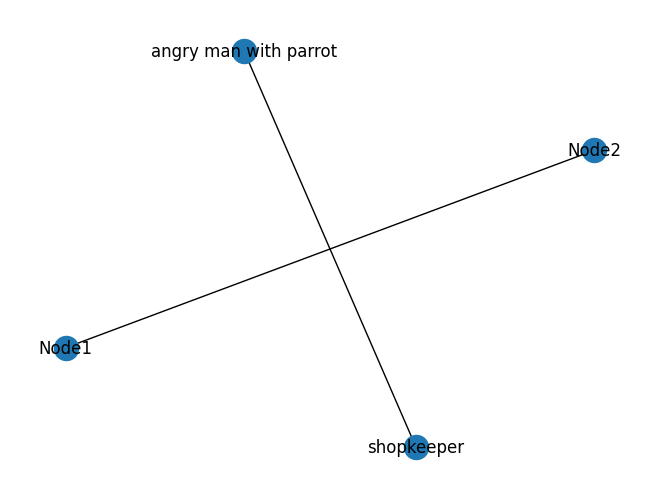

In [27]:
import networkx as nx
import pylab as plt

G=nx.Graph()
# Add nodes and edges
G.add_edge("Node1", "Node2")
nx.draw(G, with_labels = True)
plt.savefig('labels.png')


labeldict = {}
labeldict["Node1"] = "shopkeeper"
labeldict["Node2"] = "angry man with parrot"

nx.draw(G, labels=labeldict, with_labels = True)


